In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

In [22]:
s = pd.Series(list(range(3)), index=['Kevin', 'Joquinha', 'Jaloto'])
s

Kevin       0
Joquinha    1
Jaloto      2
dtype: int64

In [23]:
s.iloc[0] # By index
s.loc['Kevin']  # Get line by an index
s[1]  # Get colunm

C:\Users\RESET Lab\AppData\Local\Temp\ipykernel_19912\3429360929.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[1]  # Get colunm


np.int64(1)

In [24]:
r = pd.Series(np.random.randint(0, 100, 200))
r*=10
r.tail()

195    810
196     80
197    370
198    940
199    410
dtype: int32

In [25]:
for i, l in enumerate(r[:5]):
    print(i, l//5)

0 24
1 126
2 106
3 196
4 44


### Dataframe

In [26]:
df = pd.read_excel('./assets/Vendas.xlsx')
df.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
df.loc[0]  # First line

Código Venda                        1
Data              2019-01-01 00:00:00
ID Loja            Iguatemi Esplanada
Produto                Sapato Estampa
Quantidade                        1.0
Valor Unitário                  358.0
Valor Final                     358.0
Name: 0, dtype: object

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.tail()

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
10330,7130,2019-02-07,Rio Mar Recife,Sapato,3.0,350.0,1050.0
10331,7131,2019-02-07,Shopping Center Leste Aricanduva,Gorro Xadrez,1.0,85.0,85.0
10332,7133,2019-02-07,Center Shopping Uberlândia,Terno Linho,2.0,750.0,1500.0
10333,7134,2019-02-07,Center Shopping Uberlândia,Cueca,1.0,50.0,50.0
10334,7135,2019-02-07,Rio Mar Recife,Camisa Xadrez,1.0,105.0,105.0


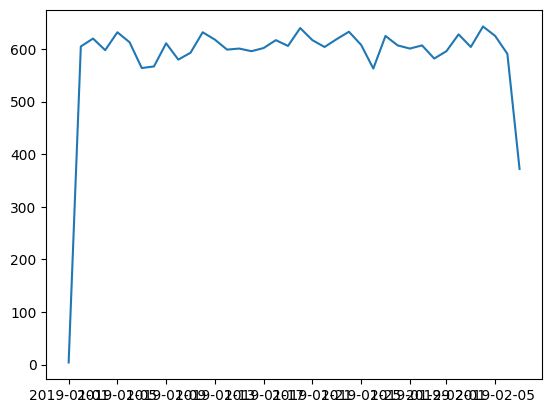

In [ ]:
vendas_por_dia = df.groupby(df['Data'])['Quantidade'].sum()
plt.plot(vendas_por_dia)

In [ ]:
df.iloc[:5, 1]  # Get a single column

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-02
4   2019-01-02
Name: Data, dtype: datetime64[ns]

In [14]:
df[df['ID Loja'] == 'Rio Mar Recife']

NameError: name 'df' is not defined

<Axes: ylabel='ID Loja'>

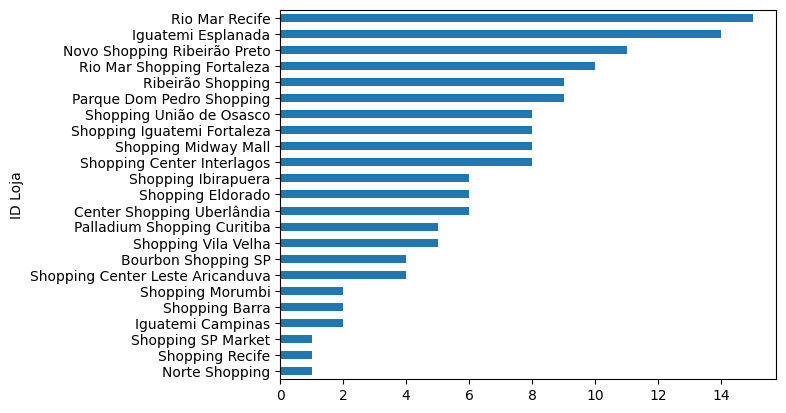

In [69]:
sapato = df.loc[df['Produto'] == 'Sapato']
sapato.groupby(sapato['ID Loja'])['Quantidade'].sum().sort_values().plot.barh()

In [23]:
df[df['Quantidade'] == 5].sort_values('Valor Final') # Sintaxe show.

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
9764,6716,2019-02-05,Salvador Shopping,Meia,5.0,30.0,150.0
808,541,2019-01-04,Shopping Midway Mall,Meia,5.0,30.0,150.0
8253,5643,2019-01-31,Shopping Iguatemi Fortaleza,Meia,5.0,30.0,150.0
6454,4402,2019-01-24,Shopping SP Market,Meia,5.0,30.0,150.0
2213,1468,2019-01-09,Shopping Barra,Meia,5.0,30.0,150.0
...,...,...,...,...,...,...,...
5543,3769,2019-01-21,Iguatemi Campinas,Terno Linho,5.0,750.0,3750.0
8714,5956,2019-02-01,Shopping Recife,Terno Linho,5.0,750.0,3750.0
9054,6188,2019-02-03,Shopping Morumbi,Terno Linho,5.0,750.0,3750.0
8043,5492,2019-01-30,Passei das Águas Shopping,Terno Linho,5.0,750.0,3750.0


<Axes: ylabel='Frequency'>

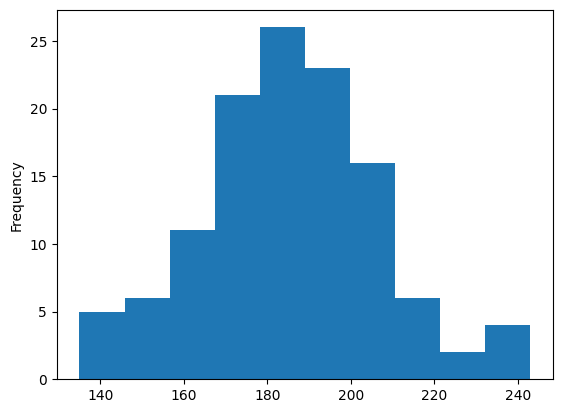

In [38]:
produtos_mais_vendidos = df.groupby(df['Produto'])['Quantidade'].sum()
produtos_mais_vendidos.sort_values().plot.hist()

<Axes: >

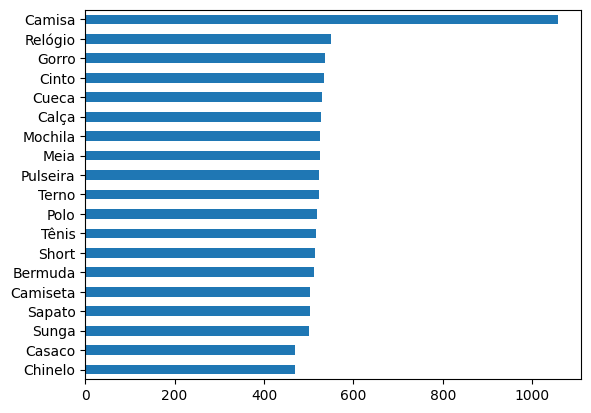

In [ ]:
from collections import Counter

mais_vendidos = Counter([x.split()[0] for x in df['Produto']])
mais_vedidos_df = pd.Series(data=mais_vendidos.values(), index=mais_vendidos.keys())

mais_vedidos_df.sort_values().plot.barh()

<Axes: ylabel='Tipo_Produto'>

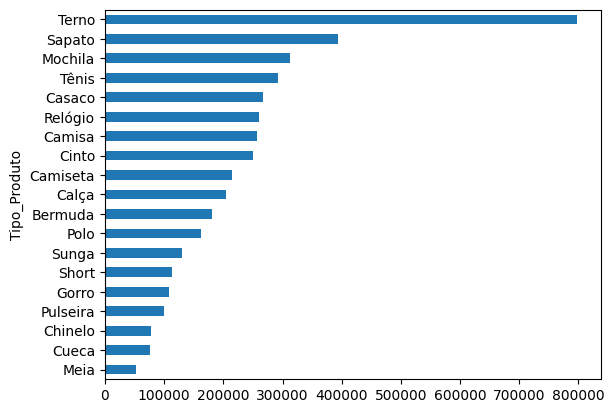

In [77]:
df['Tipo_Produto'] = df['Produto'].str.split().str[0]

maior_lucro = df.groupby(df['Tipo_Produto'])['Valor Final'].sum()
maior_lucro.sort_values().plot.barh()